# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
lat_lngs = []
cities = []


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)

len(cities)

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
count = 1 
err = 0
sets = 0
index = 0
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") 
        print(f'Processing Record {count} of Set {sets} | {city}' )
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: 
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("loop complete")
print(f'Missing data for cities')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [23]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title(f'City Latitude by Maximum Temperature ({datetime.now().date()})')
plt.savefig("LatbyTemp.png")
plt.show()

NameError: name 'sns' is not defined

<Figure size 720x576 with 0 Axes>

#### Latitude vs. Humidity Plot

In [19]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude by Humidity ({datetime.now().date()})')
plt.savefig("LatbyHumidity.png")
plt.show()

NameError: name 'datetime' is not defined

#### Latitude vs. Cloudiness Plot

ValueError: Axis limits cannot be NaN or Inf

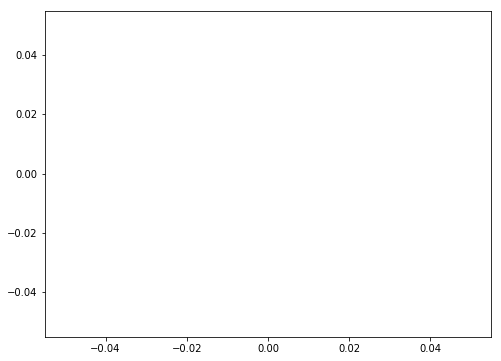

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)
sns.set()
plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude by Cloudiness ({datetime.now().date()})')
plt.savefig("LatbyCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

In [27]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='red', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude by Wind Speed ({datetime.now().date()})')
plt.savefig("LatbyWind.png")
plt.show()

NameError: name 'sns' is not defined

<Figure size 576x432 with 0 Axes>